In [1]:
## We are using the 'colorability' db credentials for all association ratings experiments. 
## Don't get confused. Yes, that means you Kushin.

##make sure you're connected to UW VPN

In [74]:
import os
import mysql.connector
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy import stats
from collections import Counter


In [75]:
# db = mysql.connector.connect(
#    host='127.0.0.1',
#     port= 3306,
#    user='root',
#    passwd='kushinm11',
#     db = 'db1',
#     auth_plugin='mysql_native_password'
# )
# table_name = ''

## Connect to DB

In [76]:
db = mysql.connector.connect(
   host="schlosslab-exp.wid.wisc.edu",
    port= 3306,
   user="colorability_op",
   passwd="auy2fovei7Bee6uC",
    db = 'colorability'
)


In [77]:
##get list of table names

cursor = db.cursor()

cursor.execute("SHOW TABLES")    # execute 'SHOW TABLES' (but data is not returned)
for (table_name,) in cursor:
    print(table_name)

condition_log
data_log
register_log


In [78]:
## this is for the dummy repo i made for Tim's lab

# db = mysql.connector.connect(
#    host="kclab-exp.wid.wisc.edu",
#     port= 3306,
#    user="color_concept_rate_op",
#    passwd="eeve8yai8pohZoh9",
#     db = 'color_concept_rate'
# )
# table_name = 'register_log'

In [79]:
table_name = 'data_log'
df = pd.read_sql_query("SELECT * FROM {}".format(table_name),
    db) ### convert table into dataframe



In [80]:
## How many in each category?
df[df.trial_type=='image-slider-responseMAS'].groupby('concept')['subject_id'].apply(lambda x: len(list(np.unique(x))))


concept
animals        48
automobiles    52
values         52
weather        53
Name: subject_id, dtype: int64

In [81]:
print('How many subjects so far?')
print(df.workerID.nunique())

How many subjects so far?
222


In [82]:
df.prompt.unique()

array([None, 'love', 'peace', 'justice', 'evil', 'greed', 'car',
       'airplane', 'boat', 'plane', 'truck', 'hurricane', 'drought',
       'blizzard', 'sandstorm', 'lightning', 'bear', 'lion', 'bird',
       'fish', 'frog'], dtype=object)

In [83]:
d_cb = df[df.trial_type=='survey-multi-choice'] ## dataframe with colorblind info
cb_exclude = []
for i, row in d_cb.iterrows():
    if row['responses'].decode('UTF-8').split('"')[3] == 'Yes':
        cb_exclude.append(row['subject_id'])

    

In [84]:
### folks to exclude
cb_exclude

['ymypo4bmnhbz4911aecn',
 'u1n0lme13vcrg58fgdaz',
 '3ug8q1arswdwou0ohz25',
 'yhs288z0nj94g7u9yr1r',
 'fgrv67037p73qz14eb8v',
 'qdtj2op8ebe1xvj7xyqx']

In [85]:
gender_responses=[]
age_responses = []

for i, row in df[df.trial_type=='survey-text'].iterrows():
    gender_responses.append(row['responses'].decode('UTF-8').split('"')[3])
    age_responses.append(row['responses'].decode('UTF-8').split('"')[7])


Counter(gender_responses)


Counter({'male': 26,
         'Female': 72,
         'Male': 34,
         'female': 55,
         'man': 1,
         'M': 1,
         'female ': 7,
         'Female ': 3,
         'Woman': 1,
         'Trans nonbinary man': 1,
         'F': 3,
         'Male ': 1})

In [86]:
Counter(age_responses)

Counter({'18': 123,
         '19': 51,
         '24': 1,
         '21': 8,
         '20': 15,
         '18 ': 1,
         '25': 2,
         '17': 2,
         '23': 1,
         '8': 1})

In [87]:
df_final = df[~(df.subject_id.isin(cb_exclude))&(df.trial_type=='image-slider-responseMAS')]

In [88]:
df_final.subject_id.nunique()

199

In [89]:
df_final.response = (df_final.response + 200)/400

/opt/homebrew/Caskroom/miniforge/base/envs/python3_8/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [90]:
df_final.groupby('concept')['subject_id'].apply(lambda x: len(list(np.unique(x))))

concept
animals        45
automobiles    51
values         50
weather        53
Name: subject_id, dtype: int64

In [19]:
import matplotlib.colors as colors

'#2f6ef6'

In [20]:
uw71coords = pd.read_csv('../../data/UW71coordinates_long.csv')
uw58coords = pd.read_csv('../../data/UW_58_rgb.csv',header=None)
uw58coords['color_hex'] = uw58coords.apply(lambda x: colors.to_hex([x[0],x[1],x[2]]),axis=1)

In [30]:
uw71touw58 = np.zeros((71,))

for i, row in uw71coords.iterrows():
    uw71touw58[i]=71
    for j, row2 in uw58coords.iterrows():
        if row['color_hex']==row2['color_hex']:
            uw71touw58[i] = j
uw71coords['uw71touw58'] = uw71touw58
for i in range(uw71coords.shape[0]):
    if uw71coords.uw71touw58[i]==71:
        uw71coords.uw71touw58[i] = np.nan

In [47]:
uw71coords.to_csv('../../data/uw71coords.csv')

In [101]:
ratings_df = df_final.groupby(['concept','prompt','color_index']).response.agg(mean_rating = 'mean', se ='sem').reset_index()

In [100]:
uw71coords

,v_index,color_index,L,a,b,C,H,r_rgb,g_rgb,b_rgb,r255,g255,b255,color_hex,uw71touw58
0,V1,0,50,28.8910,-73.589,79.057136,291.434944,0.18536,0.431390,0.964970,47.26680,110.004450,246.067350,#2f6ef6,16.0
1,V2,1,25,53.8570,-72.280,90.138642,306.690392,0.20878,0.093277,0.677550,53.23890,23.785635,172.775250,#3518ad,17.0
2,V3,2,50,53.8570,-72.280,90.138642,306.690392,0.52107,0.343280,0.957410,132.87285,87.536400,244.139550,#8558f4,18.0
3,V4,3,50,78.8220,-70.972,106.065699,317.999859,0.71554,0.182090,0.950150,182.46270,46.432950,242.288250,#b62ef2,19.0
4,V5,4,50,2.6168,-49.931,49.999524,273.000031,0.02815,0.479950,0.800070,7.17825,122.387250,204.017850,#077acc,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,V67,66,75,-28.8910,73.589,79.057136,111.434944,0.66567,0.770750,0.060920,169.74585,196.541250,15.534600,#aac510,54.0
67,V68,67,88,-28.8910,73.589,79.057136,111.434944,0.81500,0.913800,0.258170,207.82500,233.019000,65.833350,#d0e942,NaN
68,V69,68,75,-3.9252,74.897,74.999785,93.000011,0.83409,0.720190,0.066708,212.69295,183.648450,17.010540,#d5b811,56.0
69,V70,69,88,-3.9252,74.897,74.999785,93.000011,0.98973,0.860650,0.257390,252.38115,219.465750,65.634450,#fcdb42,NaN


In [140]:
uw71to58_dict = dict(zip(uw71coords.color_index, uw71coords.uw71touw58)) 

In [129]:
ratings_df.color_index= ratings_df.color_index.astype(int)
uw71_tups = np.array(uw71coords.apply(lambda x: tuple([x['r_rgb'],x['g_rgb'],x['b_rgb']]),axis=1))

sns.color_palette(uw71_tups)

[(0.18536, 0.43139, 0.96497),
 (0.20878, 0.093277, 0.67755),
 (0.52107, 0.34328, 0.95741),
 (0.71554, 0.18209, 0.95015),
 (0.02815, 0.47995, 0.80007),
 (0.17927, 0.18835, 0.5261),
 (0.45531, 0.41794, 0.79284),
 (0.37742, 0.042633, 0.5195),
 (0.64719, 0.32647, 0.78598),
 (0.80294, 0.14735, 0.7795),
 (0.30294, 0.78057, 0.90983),
 (0.11078, 0.23798, 0.38006),
 (0.36676, 0.47151, 0.63164),
 (0.62755, 0.72906, 0.90271),
 (0.31571, 0.17533, 0.37401),
 (0.56583, 0.4087, 0.62522),
 (0.83493, 0.66423, 0.89597),
 (0.44844, 0.0010157, 0.36856),
 (0.72068, 0.31508, 0.61928),
 (0.85795, 0.12084, 0.61389),
 (0.22415, 0.96405, 0.87881),
 (0.23228, 0.51203, 0.47224),
 (0.49553, 0.7754, 0.73022),
 (0.63541, 0.91934, 0.87189),
 (0.0, 0.0, 0.0),
 (0.23251, 0.23251, 0.23251),
 (0.46633, 0.46633, 0.46633),
 (0.7239, 0.7239, 0.7239),
 (1.0, 1.0, 1.0),
 (0.86539, 0.86539, 0.86539),
 (0.36814, 0.16901, 0.22803),
 (0.62657, 0.4033, 0.46106),
 (0.90215, 0.65899, 0.71809),
 (0.76433, 0.30881, 0.45651),
 (0.89143, 0.10584, 0.45276),
 (0.29264, 0.81366, 0.55522),
 (0.45168, 0.96053, 0.69143),
 (0.093053, 0.26787, 0.081612),
 (0.33427, 0.50935, 0.30369),
 (0.58834, 0.77224, 0.54935),
 (0.72747, 0.91598, 0.68535),
 (0.26859, 0.23099, 0.078708),
 (0.51566, 0.46391, 0.29927),
 (0.78226, 0.72092, 0.54415),
 (0.92752, 0.86218, 0.67984),
 (0.38773, 0.16814, 0.078494),
 (0.65938, 0.40118, 0.29597),
 (0.94491, 0.65619, 0.53969),
 (0.78826, 0.307, 0.2939),
 (0.90961, 0.10388, 0.29318),
 (0.054615, 0.54224, 0.099689),
 (0.40222, 0.81194, 0.36144),
 (0.54989, 0.95852, 0.49572),
 (0.37476, 0.50866, 0.096059),
 (0.63947, 0.77079, 0.35693),
 (0.78297, 0.91421, 0.49082),
 (0.53807, 0.4637, 0.095726),
 (0.81654, 0.7198, 0.35358),
 (0.96685, 0.86069, 0.48682),
 (0.67414, 0.40164, 0.098965),
 (0.97029, 0.65547, 0.35149),
 (0.79852, 0.30871, 0.10571),
 (0.91683, 0.11258, 0.11559),
 (0.24405, 0.99448, 0.26544),
 (0.45104, 0.81154, 0.061681),
 (0.60202, 0.9578, 0.2609),
 (0.66567, 0.77075, 0.06092),
 (0.815, 0.9138, 0.25817),
 (0.83409, 0.72019, 0.066708),
 (0.98973, 0.86065, 0.25739),
 (0.9829, 0.65643, 0.078187)]

Text(0.5, 1.0, 'bear')

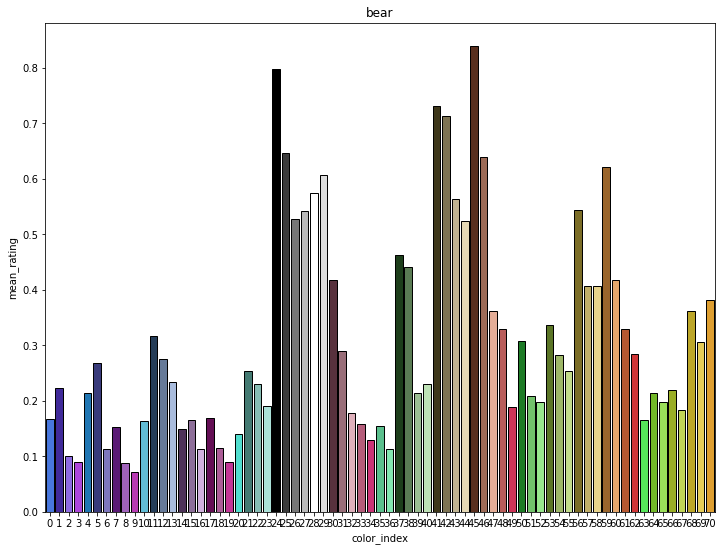

In [134]:
import seaborn as sns

sub = ratings_df[ratings_df['prompt']=='bear']
plt.figure(figsize=(12,9))
sns.barplot(data = sub, x='color_index', y = 'mean_rating',palette=uw71_tups,edgecolor='k')
plt.legend([],[], frameon=False)
plt.title('bear')


Text(0.5, 1.0, 'love')

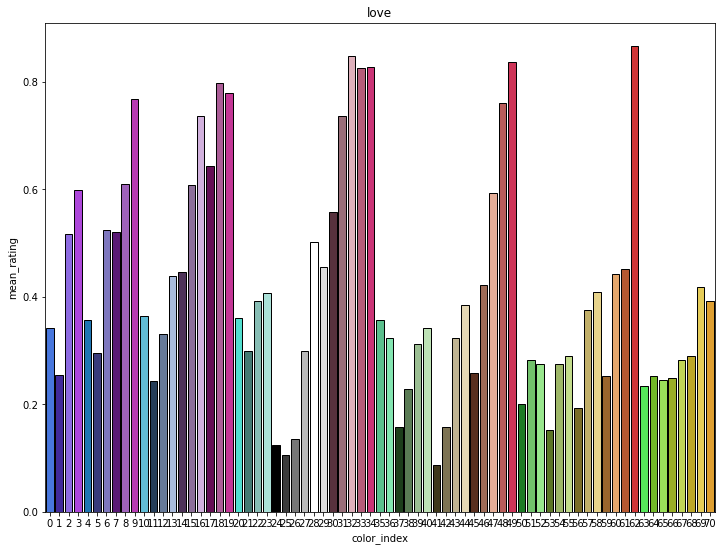

In [135]:
sub = ratings_df[ratings_df['prompt']=='love']
plt.figure(figsize=(12,9))
sns.barplot(data = sub, x='color_index', y = 'mean_rating',palette=uw71_tups,edgecolor='k')
plt.legend([],[], frameon=False)
plt.title('love')


Text(0.5, 1.0, 'greed')

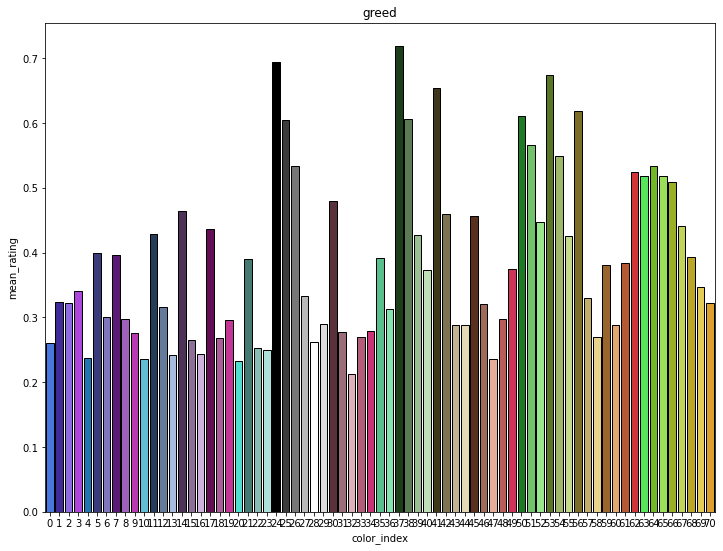

In [136]:
sub = ratings_df[ratings_df['prompt']=='greed']
plt.figure(figsize=(12,9))
sns.barplot(data = sub, x='color_index', y = 'mean_rating',palette=uw71_tups,edgecolor='k')
plt.legend([],[], frameon=False)
plt.title('greed')

Text(0.5, 1.0, 'airplane')

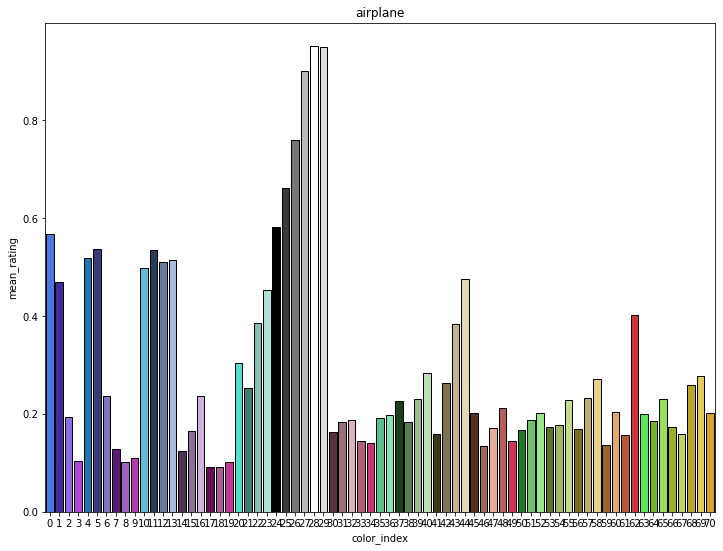

In [197]:
import seaborn as sns

sub = ratings_df[ratings_df['prompt']=='airplane']
plt.figure(figsize=(12,9))
sns.barplot(data = sub, x='color_index', y = 'mean_rating',palette=uw71_tups,edgecolor='k')
plt.legend([],[], frameon=False)
plt.title('airplane')

Text(0.5, 1.0, 'truck')

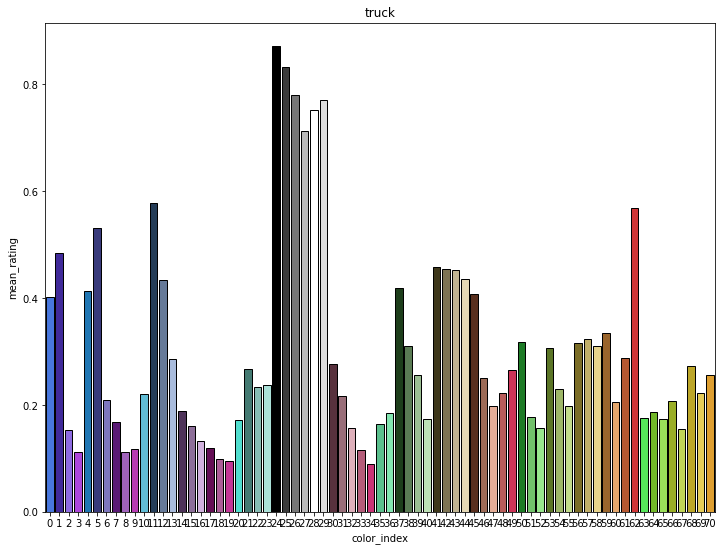

In [198]:
import seaborn as sns

sub = ratings_df[ratings_df['prompt']=='truck']
plt.figure(figsize=(12,9))
sns.barplot(data = sub, x='color_index', y = 'mean_rating',palette=uw71_tups,edgecolor='k')
plt.legend([],[], frameon=False)
plt.title('truck')

Text(0.5, 1.0, 'boat')

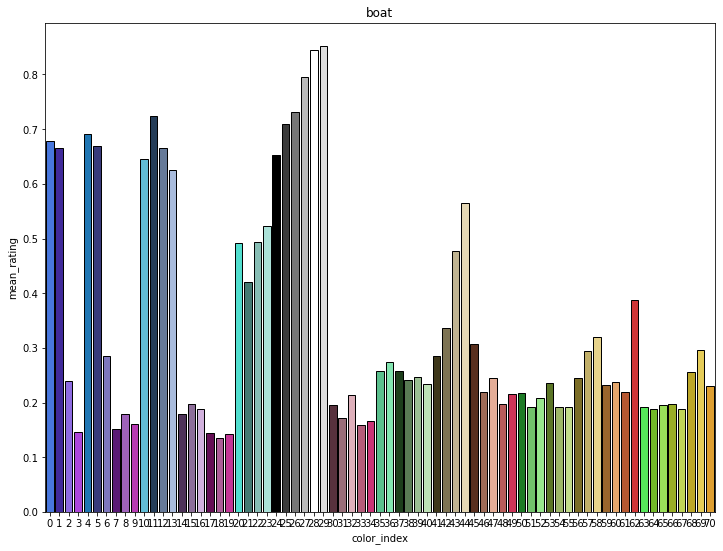

In [200]:
import seaborn as sns

sub = ratings_df[ratings_df['prompt']=='boat']
plt.figure(figsize=(12,9))
sns.barplot(data = sub, x='color_index', y = 'mean_rating',palette=uw71_tups,edgecolor='k')
plt.legend([],[], frameon=False)
plt.title('boat')

Text(0.5, 1.0, 'car')

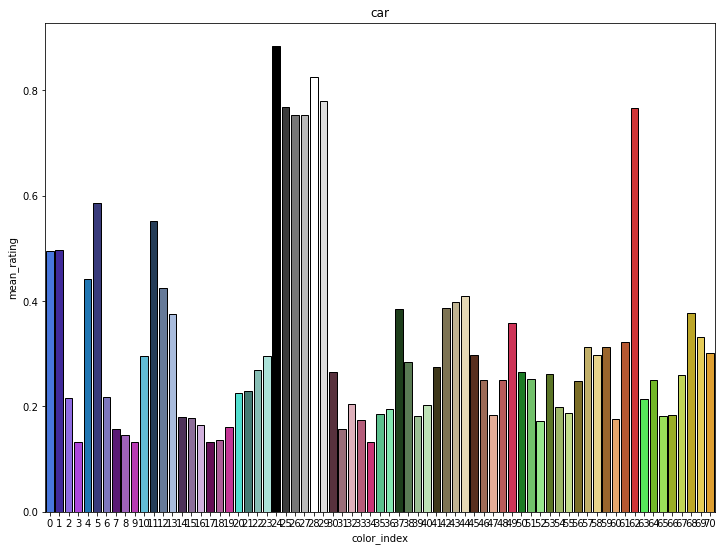

In [199]:
import seaborn as sns

sub = ratings_df[ratings_df['prompt']=='car']
plt.figure(figsize=(12,9))
sns.barplot(data = sub, x='color_index', y = 'mean_rating',palette=uw71_tups,edgecolor='k')
plt.legend([],[], frameon=False)
plt.title('car')

In [142]:
ratings_df['uw71to58'] = ratings_df.apply(lambda x: uw71to58_dict[x['color_index']],axis=1)

In [147]:
ratings_df= ratings_df.sort_values(by = ['concept','prompt','uw71to58'],na_position='last')

In [171]:
ratings_mat = np.zeros((20,71))

In [176]:
cc = 0
for i in ratings_df.prompt.unique():
    
    sub_df = ratings_df[ratings_df['prompt']==i].reset_index()
    for j in range(sub_df.shape[0]):
        ratings_mat[cc,j] = sub_df['mean_rating'][j]
    cc+=1

In [186]:
uw71_ordering = ratings_df[ratings_df['prompt']=='bear']['color_index'].values

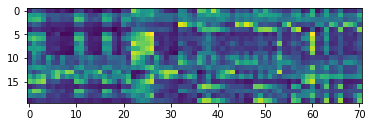

In [179]:
plt.imshow(ratings_mat)

In [169]:
ratings_df[ratings_df['concept']==i]

,concept,prompt,color_index,mean_rating,se,uw71to58


In [191]:
ratings_mat = pd.DataFrame(ratings_mat, columns=uw71_ordering,index=ratings_df.prompt.unique())

In [192]:
ratings_mat.to_csv('../../data/generalization_data.csv')

In [195]:
ratings_mat

,10,11,12,13,14,15,16,17,18,19,...,36,40,44,52,55,58,63,65,67,69
bear,0.163389,0.316222,0.276111,0.234111,0.150167,0.164778,0.113389,0.168500,0.114556,0.090500,...,0.113389,0.229889,0.523667,0.197111,0.253556,0.407278,0.165167,0.197944,0.183056,0.305778
bird,0.565056,0.549778,0.567333,0.477611,0.318889,0.327778,0.325722,0.281167,0.287056,0.305444,...,0.276333,0.378444,0.570500,0.381722,0.372444,0.612833,0.361722,0.395500,0.405500,0.627000
fish,0.619889,0.657278,0.676167,0.528056,0.240389,0.310889,0.309500,0.260111,0.279444,0.247611,...,0.402278,0.403056,0.448333,0.389333,0.414389,0.419111,0.303111,0.361778,0.360167,0.499333
frog,0.261889,0.362222,0.326444,0.216611,0.160278,0.189611,0.183889,0.174889,0.155111,0.160444,...,0.474444,0.492722,0.312667,0.691778,0.580167,0.324222,0.761667,0.700389,0.556611,0.274333
lion,0.128667,0.203111,0.203889,0.162222,0.153611,0.123222,0.136167,0.151778,0.121000,0.119944,...,0.108167,0.197944,0.613500,0.174444,0.230556,0.735167,0.185222,0.212944,0.313056,0.792167
airplane,0.497157,0.535294,0.509755,0.514755,0.124314,0.164902,0.236716,0.091225,0.092059,0.102451,...,0.197843,0.284461,0.475343,0.201569,0.229216,0.271667,0.199167,0.230882,0.159559,0.276569
boat,0.645147,0.725000,0.665441,0.625784,0.179118,0.196863,0.187500,0.145049,0.134951,0.142304,...,0.273676,0.233333,0.565000,0.208088,0.191569,0.319559,0.191373,0.196324,0.188922,0.296520
car,0.294902,0.552059,0.425490,0.374461,0.180735,0.178235,0.164069,0.132010,0.136618,0.161765,...,0.194755,0.202843,0.409755,0.172108,0.187304,0.297990,0.213676,0.181471,0.259657,0.331814
plane,0.549314,0.555147,0.578971,0.534853,0.178235,0.196912,0.201373,0.129559,0.122010,0.105098,...,0.225098,0.279412,0.505931,0.230735,0.245931,0.292696,0.170294,0.186618,0.228725,0.286863
truck,0.221127,0.578676,0.433676,0.286569,0.188186,0.161225,0.133382,0.120000,0.098480,0.096127,...,0.184657,0.173824,0.436765,0.157794,0.197843,0.309853,0.175294,0.173627,0.156029,0.222108


In [196]:
ratings_df.prompt.unique()

array(['bear', 'bird', 'fish', 'frog', 'lion', 'airplane', 'boat', 'car',
       'plane', 'truck', 'evil', 'greed', 'justice', 'love', 'peace',
       'blizzard', 'drought', 'hurricane', 'lightning', 'sandstorm'],
      dtype=object)